# Machine learning to predict molecule properties : solubility



Laurent Cetinsoy

The solubility of molecules is an important property in many applications like for drug selection or for compound selection for battery designes (no link to health).

Being able to predict the solubility of a molecule from its formula instead of having to make measuring experiment in an important aspect to enhanced fatester molecule discovery.

In this notebook we will do basic solubility prediction with machine learning models and rdkit


Install the python rdkit package with pip or conda

cf https://www.rdkit.org/docs/index.html

References :

- https://www.rdkit.org/docs/GettingStartedInPython.html
- https://www.rdkit.org/docs/Cookbook.html



# Atom and Molecule representations with Rdkit

Rdkit is a package allowing to work with molecule data and their representation. It is very useful to gather information about atom and molecules. Especially about their physical and chemical properties. In this notebook we will learn about them

For basic manipulations, the main submodule is **Chem**



### Smile representation

Smile lets represent molecules with text strings.


Like many representations in chemistry we do not represent hydrogene atoms, indeed we can deduce it from the rest of the data.


The following code define the Smile Representation of a very simple molecule. We will try to find out more

In [1]:
smile_molecule = "C"

From the rdkit.Chem submodule, import MolFromSmiles

Using MolFromSmiles, load smile_molecule into a rdkit molecule. Store it in a variable named first_mol

In [2]:
from rdkit import Chem

first_mol = Chem.MolFromSmiles(smile_molecule)
assert(first_mol is not None)

display the type of first_mol

In [3]:
print(f"Type of first_mol is: {type(first_mol)}")

Type of first_mol is: <class 'rdkit.Chem.rdchem.Mol'>


With the dir function, list the public methods of the object instance first_mol

In [4]:
print(dir(first_mol))

['AddConformer', 'ClearComputedProps', 'ClearProp', 'ClearPropertyCache', 'Debug', 'GetAromaticAtoms', 'GetAtomWithIdx', 'GetAtoms', 'GetAtomsMatchingQuery', 'GetBondBetweenAtoms', 'GetBondWithIdx', 'GetBonds', 'GetBoolProp', 'GetConformer', 'GetConformers', 'GetDoubleProp', 'GetIntProp', 'GetNumAtoms', 'GetNumBonds', 'GetNumConformers', 'GetNumHeavyAtoms', 'GetProp', 'GetPropNames', 'GetPropsAsDict', 'GetRingInfo', 'GetStereoGroups', 'GetSubstructMatch', 'GetSubstructMatches', 'GetUnsignedProp', 'HasProp', 'HasQuery', 'HasSubstructMatch', 'NeedsUpdatePropertyCache', 'RemoveAllConformers', 'RemoveConformer', 'SetBoolProp', 'SetDoubleProp', 'SetIntProp', 'SetProp', 'SetUnsignedProp', 'ToBinary', 'UpdatePropertyCache', '__DebugMol', '__GetSubstructMatch', '__GetSubstructMatches', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getinitargs__', '__getstate__', '__getstate_manages_dict__', '__

Among all the methods, you should have found a method allowing you to get the number of atoms.
Call it and store the result in a variable n_atoms and display it

In [5]:
n_atoms = first_mol.GetNumAtoms()
print(f"Number of atoms: {n_atoms}")

Number of atoms: 1


Using Draw from rdkit.Chem module, draw the moldule

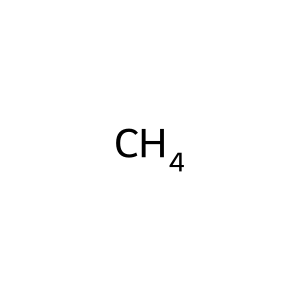

In [6]:
Chem.Draw.MolToImage(first_mol)

Do you see a contradiction between the MolToImage and GetNumOfAtoms ? Can you explain why below


`MolToImage` shows a molecule with 5 atoms (1 carbon and 4 hydrogenes) and `GetNumAtoms` returns 1. This is due to the `MolFromSiles` function and the SMILES notation which doesn't list explicit hydrogenes atoms. Therefore, when drawn with `MolToImage`, a realistic molecule is shown, 4 hydrogenes atoms are thus added in order to respect the valence of the carbon.

We will tell rdkit to clone the molecule but to add the hydrogen atoms now.
Create a new molecule from first_mol using the method AddHs.
Store it in a variable named mol2

In [7]:
mol2 = Chem.AddHs(first_mol)

Display the number of Atoms now

In [8]:
n_atoms_mol2 = mol2.GetNumAtoms()
print(f"Number of atoms in mol2: {n_atoms_mol2}")

Number of atoms in mol2: 5


Display the number of Heavy Atoms (check the methods from dir output)

In [9]:
n_hatoms_mol2 = mol2.GetNumHeavyAtoms()
print(f"Number of heavy atoms in mol2: {n_hatoms_mol2}")

Number of heavy atoms in mol2: 1


Is it coherent ?

Heavy atoms refers to any atom that is not hydrogen, `mol2` was build from one carbon atom (from `first_mol`) plus 4 hydrogenes that we added with `AddHs` and is therfore composed of one heavy atom of carbon. It is then coherent.

With the MolToImage function of the Draw package, display the molecule mol2.

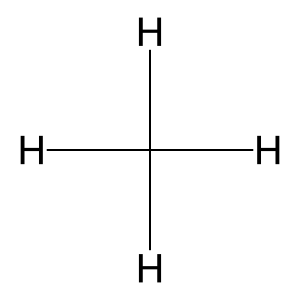

In [10]:
Chem.Draw.MolToImage(mol2)

Let's look at a real molecule now.

The following string contains the SMILE representation of the paracetamol molecule

In [11]:
smile = 'CC(=O)NC1=CC=C(O)C=C1'

Using the MolFromSmiles function, create a molecule from the smile representation and print its types

In [12]:
real_mol = Chem.MolFromSmiles(smile)
print(f"Type of real_mol: {type(real_mol)}")

Type of real_mol: <class 'rdkit.Chem.rdchem.Mol'>


With the MolToImage function of the Draw package, display the molecule

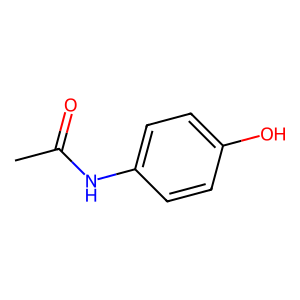

In [13]:
Chem.Draw.MolToImage(real_mol)

You can get the Number of atoms of the molecules and the list of atoms with the methods GetNumAtoms and GetAtoms.

Print the number of atoms of the molecule

In [14]:
n_atoms_real_mol = real_mol.GetNumAtoms()
print(f"Number of atoms in real_mol: {n_atoms_real_mol}")
print("Atoms of real_mol: ", end=' ')
for atom in real_mol.GetAtoms():
    print(atom.GetSymbol(), end=' ')

Number of atoms in real_mol: 11
Atoms of real_mol:  C C O N C C C C O C C 

If you compare to the picture, you may see that the number of atoms is not 11. What is the total number and why rdkit do not give the same answer ?

The total number of atoms is 20, rdkit do not count hydrogenes atoms.

Print the list of each atoms

In [15]:
real_mold_with_hs = Chem.AddHs(real_mol)
tot_n_atoms_real_mol = real_mold_with_hs.GetNumAtoms()
print(f"Total number of atoms: {tot_n_atoms_real_mol}")
print("Atoms of real_mold_with_hs: ", end=' ')
for atom in real_mold_with_hs.GetAtoms():
    print(atom.GetSymbol(), end=' ')

Total number of atoms: 20
Atoms of real_mold_with_hs:  C C O N C C C C O C C H H H H H H H H H 

Store the number of bonds of the molecule in **n_bond** (look which method can be used for that) and print

In [16]:
n_bond = real_mold_with_hs.GetNumBonds()
print(f"Number of bonds in real_mod: {n_bond}")

Number of bonds in real_mod: 20


For each bond, print if the bond is single or double

In [17]:
for bond in real_mold_with_hs.GetBonds():
    print(bond.GetBeginAtom().GetSymbol(), "-", bond.GetEndAtom().GetSymbol(), ":",
          bond.GetBondType())

C - C : SINGLE
C - O : DOUBLE
C - N : SINGLE
N - C : SINGLE
C - C : AROMATIC
C - C : AROMATIC
C - C : AROMATIC
C - O : SINGLE
C - C : AROMATIC
C - C : AROMATIC
C - C : AROMATIC
C - H : SINGLE
C - H : SINGLE
C - H : SINGLE
N - H : SINGLE
C - H : SINGLE
C - H : SINGLE
O - H : SINGLE
C - H : SINGLE
C - H : SINGLE


### Reading molecule data from file

Apart SMILES, .SDF and .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


Download this file and save it in a folder.



In [18]:
#!wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf

SDF files can contain one or more molecules. To load them, you can use SDMolSupplier. When you use it it will return you an object that looks like a list.

Read the file that you've downloaded using "rdkit.Chem.SDMolSupplier" and get the first molecule (the only one) and  store it in a variable named **morphine**

In [19]:
suppl = Chem.SDMolSupplier("data/morphine.sdf")
morphine = suppl[0]

Display its type

In [20]:
print(type(morphine))

<class 'rdkit.Chem.rdchem.Mol'>


Display the picture of the molecule


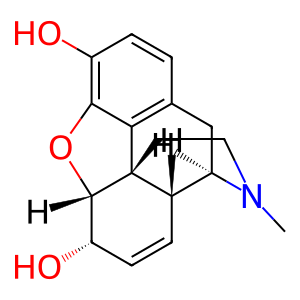

In [21]:
Chem.Draw.MolToImage(morphine)

Display the number of atoms and the number of bonds

In [22]:
print(f"Number of atoms without hydrogenes: {morphine.GetNumAtoms()}")
h_morphine = Chem.AddHs(morphine)
print(f"Number of atoms with hydrogenes: {h_morphine.GetNumAtoms()}")
print(f"Number of bons (with H): {h_morphine.GetNumBonds()}")

Number of atoms without hydrogenes: 21
Number of atoms with hydrogenes: 40
Number of bons (with H): 44


### Descriptors


Molecules are also described by a set of physiochemical descriptors like
- the log partition coefficient,
- the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.

The rdkit.Chem.Descriptors module and its sub module let us compute molecule descriptors.

the rdkit.Chem.Descriptors module has an attribute name \_descList, display it. It contains a list of tuple. Each tuple has the name of the physical property, and function associated to it to compute the given property

In [23]:
from rdkit.Chem import Descriptors
print(Descriptors._descList[:20])

[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x127cf5e80>), ('MaxEStateIndex', <function MaxEStateIndex at 0x127cf5d20>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x127cf5f30>), ('MinEStateIndex', <function MinEStateIndex at 0x127cf5dd0>), ('qed', <function qed at 0x127d59170>), ('SPS', <function SPS at 0x127d59640>), ('MolWt', <function <lambda> at 0x127d594e0>), ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0x127d59590>), ('ExactMolWt', <function <lambda> at 0x127d59dd0>), ('NumValenceElectrons', <function NumValenceElectrons at 0x127d59e80>), ('NumRadicalElectrons', <function NumRadicalElectrons at 0x127d59f30>), ('MaxPartialCharge', <function MaxPartialCharge at 0x127d5a090>), ('MinPartialCharge', <function MinPartialCharge at 0x127d5a140>), ('MaxAbsPartialCharge', <function MaxAbsPartialCharge at 0x127d5a1f0>), ('MinAbsPartialCharge', <function MinAbsPartialCharge at 0x127d5a2a0>), ('FpDensityMorgan1', <function FpDensityMorgan1 at 0x127d5a4b0>), ('FpDensityM

Compute all descriptors in the _descList list of the paracetamol molecule using the MoleculeDescriptors.MolecularDescriptorCalculator class

In [24]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

paracetamol = real_mol
names = []
for name, _ in Descriptors._descList:
    names.append(name)
calc = MolecularDescriptorCalculator(names)
values = calc.CalcDescriptors(mol=paracetamol)

Display the names and the fvalues of the descriptors

In [25]:
for name, value in zip(names[:10], values[:10]):
    print(f"{name} = {value}")

MaxAbsEStateIndex = 10.524468537414966
MaxEStateIndex = 10.524468537414966
MinAbsEStateIndex = 0.11510204081632636
MinEStateIndex = -0.11510204081632636
qed = 0.5950261967780848
SPS = 9.181818181818182
MolWt = 151.165
HeavyAtomMolWt = 142.093
ExactMolWt = 151.063328528
NumValenceElectrons = 58


### Fingerprinting


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.





With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [26]:
from rdkit.Chem import AllChem

fp = AllChem.GetMorganFingerprintAsBitVect(paracetamol, radius=3)

[09:16:38] DEPRECATION WARNING: please use MorganGenerator


Display its type

In [27]:
print(type(fp))

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>


With the DataStructs module convert it to a numpy vector and display it shape and display it

In [28]:
import numpy as np
from rdkit import DataStructs

fp_np = np.zeros((0, ), dtype=np.int8)
DataStructs.ConvertToNumpyArray(fp, fp_np)
print(fp_np.shape)
print(fp_np)

(2048,)
[0 0 0 ... 0 0 0]


Create a function smiles_to_np_morganfingerprinting which takes a smile representation and gives back the numpy version of the morgan finger_printing

In [29]:
def smiles_to_np_morganfingerprinting(smile):
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3)
    fp_np = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, fp_np)
    return fp_np

Compute the morgan finger printing of the aspirin (CC(=O)OC1=CC=CC=C1C(O)=O) and paracetamol (CC(=O)NC1=CC=C(O)C=C1)

In [30]:
aspirin = smiles_to_np_morganfingerprinting("CC(=O)OC1=CC=CC=C1C(O)=O")
paracetamol = smiles_to_np_morganfingerprinting("CC(=O)NC1=CC=C(O)C=C1")

[09:16:38] DEPRECATION WARNING: please use MorganGenerator
[09:16:38] DEPRECATION WARNING: please use MorganGenerator


Compute the DiceSimilarity of the two molecules

In [31]:
from scipy.spatial import distance

dist = distance.dice(aspirin, paracetamol)
print(f"Distance between the two molecules is: {dist}")

Distance between the two molecules is: 0.7142857142857143
